# Santander Project

### We predict Satisfied(0), or Not(1)  
### label -> "TARGET"  
### Evaluation : ROC-AUC <- More suitable than accuracy

# import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
path='/kaggle/input/santander-customer-satisfaction/'
train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')
submission=pd.read_csv(path+'sample_submission.csv')
train.shape, test.shape

((76020, 371), (75818, 370))

# See DataFrame

In [2]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


#### float과 int로만 이루어져 있다

In [4]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [5]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# EDA

#### var3 in -999.. has Null-data

In [6]:
for c in train.columns:
    if train[c].min()==-999999: print(c)

var3


#### only var3 has -999... data

In [7]:
train['var3'].value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

#### replace 2

In [8]:
drop_list=[]
for c in train.columns:
    if train[c].std()==0: drop_list.append(c)

#### We delete drop_list feature

In [9]:
len(drop_list)

34

#### features in droplist useless predict (Because constant 0 value)  

# DataSet 

In [10]:
train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')

In [11]:
for c in test.columns:
    if test[c].min()==-999999: print(c)

var3


#### test data also var3 has Null-data only

In [12]:
y=train['TARGET']
train=train.iloc[:,:-1]
X=pd.concat([train, test], ignore_index=True)
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [13]:
X.shape

(151838, 370)

# Feature Engineering

In [14]:
X['var3'].replace(-999999, 2, inplace=True)
X.drop(drop_list, axis=1, inplace=True)
X.drop('ID', axis=1, inplace=True)
remove = []
c = X.columns
for i in range(len(c)-1):
    v = X[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,X[c[j]].values):
            remove.append(c[j])
print(len(remove))
X.drop(remove, axis=1, inplace=True)

27


In [15]:
X.shape

(151838, 308)

# Train/Test divid & make early stopping vaild data

In [16]:
Train, Test=X[:train.shape[0]], X[train.shape[0]:]
Train.shape

(76020, 308)

In [17]:
from sklearn.model_selection import train_test_split
# early stopping valid data
X_train, X_valid, y_train, y_valid=train_test_split(Train, y, test_size=0.2, random_state=42)

# LightGBM Model + Optuna 

In [18]:
from lightgbm import LGBMClassifier
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import roc_auc_score

def objective_func(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves',10, 40),
        'max_depth': trial.suggest_int('max_depth',30, 70),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-6, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 700),
        'min_child_samples': trial.suggest_int('min_child_samples', 70, 160),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1)
    }
    model=LGBMClassifier(**params)
    lgbm_model = model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='auc', verbose=False, early_stopping_rounds=25)
    score = roc_auc_score(y_valid, lgbm_model.predict_proba(X_valid)[:,1])
    return score 

In [19]:
sampler = TPESampler(seed=10)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective_func, n_trials=50)
trial = study.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

[I 2023-02-13 06:40:42,493] A new study created in memory with name: no-name-822777c5-99da-4264-abbf-3df6df066ba2
[I 2023-02-13 06:40:50,975] Trial 0 finished with value: 0.8359378306503592 and parameters: {'num_leaves': 33, 'max_depth': 30, 'learning_rate': 0.0014731303415988814, 'n_estimators': 550, 'min_child_samples': 115, 'subsample': 0.6}. Best is trial 0 with value: 0.8359378306503592.
[I 2023-02-13 06:40:52,199] Trial 1 finished with value: 0.8073520895663717 and parameters: {'num_leaves': 16, 'max_depth': 61, 'learning_rate': 7.007356015618791e-06, 'n_estimators': 153, 'min_child_samples': 132, 'subsample': 1.0}. Best is trial 0 with value: 0.8359378306503592.
[I 2023-02-13 06:40:58,248] Trial 2 finished with value: 0.8412778392436712 and parameters: {'num_leaves': 10, 'max_depth': 50, 'learning_rate': 0.011563912803570744, 'n_estimators': 468, 'min_child_samples': 135, 'subsample': 0.6}. Best is trial 2 with value: 0.8412778392436712.
[I 2023-02-13 06:41:02,028] Trial 3 finis

Best Trial: score 0.84482238288001,
params {'num_leaves': 31, 'max_depth': 36, 'learning_rate': 0.010655575685164459, 'n_estimators': 452, 'min_child_samples': 112, 'subsample': 0.7}


In [20]:
from optuna import visualization
optuna.visualization.plot_param_importances(study)

# OOF (5-fold)

In [21]:
from sklearn.model_selection import cross_val_score
lgbm_best=LGBMClassifier(**trial_params)
score=cross_val_score(lgbm_best, Train, y, cv=5, scoring='roc_auc', verbose=True)
print(score)
print(np.mean(score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.83487159 0.82525495 0.84131446 0.85500428 0.83869666]
0.839028386672856


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.0s finished


In [22]:
lgbm_best.fit(Train, y, eval_metric='auc')

LGBMClassifier(learning_rate=0.010655575685164459, max_depth=36,
               min_child_samples=112, n_estimators=452, subsample=0.7)

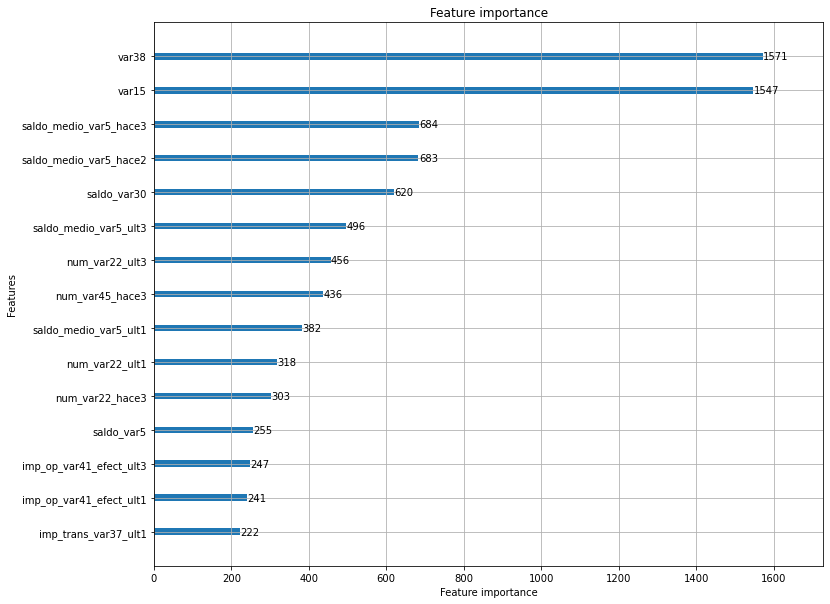

In [23]:
from lightgbm import plot_importance
f,ax=plt.subplots(1,1,figsize=(12,10))
plot_importance(lgbm_best, ax=ax, max_num_features=15);

# Submit

In [24]:
preds=lgbm_best.predict_proba(Test)
submission['TARGET']=preds[:,1]
submission.to_csv('submission.csv', index=False)